# Simplified SIR model with vaccinations

The standard SIR model reads:

$\frac{dS}{dt} = - \beta I \frac{S}{N}$

$\frac{dI}{dt} =   \beta I \frac{S}{N} - \gamma I$

$\frac{dR}{dt} =  \gamma I$

I use the following approximation:

$\frac{S}{N} \sim 1$

Hence, I can use only the second and the third equation.
In addition, one can introduce vaccinations too.
Another approximation is that the vaccination rate is constant in time, which is not hard to believe, and mostly true, looking at the available data.
With this, I write:

$\frac{dI}{dt} =   \beta I \frac{S}{N} - \gamma I - \alpha$

$\frac{dR}{dt} =  \gamma I$

where $\alpha$ comes from data.
There are two scenarios here:

$\alpha_{IT} \sim 0.2$

$\alpha_{UK} \sim 0.6$

In [54]:
import numpy as np
import scipy.optimize as scopt
import scipy.integrate as scint
import scipy.optimize as scopt

def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt


def test_pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt


def SimplifiedSIR(y, t, beta, tau, gamma):
    I, R = y
    dydt = [ (beta*np.exp(-t/tau) - gamma)*I, gamma*I]
    return dydt

def SimplifiedSIR_2(y, t, beta, gamma):
    I, R = y
    dydt = [ (beta - gamma)*I, gamma*I]
    return dydt

Taking the constants from the following paper:
https://arxiv.org/pdf/2005.08724.pdf

In [55]:
beta_0  = 0.384
tau_0   = 26.33
gamma_0 = 0.048

y_0 = [1.,1.]


guess = [0.5, 30, 0.1]
t     = np.linspace(0, 1, 11)
t2    = np.linspace(0, 1, 14)

sol   = scint.odeint(SimplifiedSIR, y_0, t, args=(beta_0, tau_0, gamma_0))

# popt, pcov = scopt.curve_fit(test_pend, guess, t, sol)
# popt, pcov = scopt.curve_fit(SimplifiedSIR, guess, t, sol)

In [56]:
sol

array([[1.        , 1.        ],
       [1.03409552, 1.00488143],
       [1.06919821, 1.00992892],
       [1.10533249, 1.01514738],
       [1.14252319, 1.02054181],
       [1.1807956 , 1.02611733],
       [1.22017546, 1.03187922],
       [1.26068891, 1.03783283],
       [1.30236256, 1.04398369],
       [1.34522346, 1.05033741],
       [1.38929909, 1.05689978]])

In [57]:
# popt, pcov = scopt.curve_fit(SimplifiedSIR, guess, t, sol)


def f(t, a0, a1, beta, tau, gamma): 
    y_00 = [a0, a1]
    tspan = np.hstack([[0],np.hstack([t])])
    return scint.odeint(SimplifiedSIR, y_00, tspan, args=(beta,tau,gamma))[1:,0]
#     return scint.odeint(SimplifiedSIR, [a0,a1], tspan, args=(beta,tau,gamma))[1:,0]

def f0(t, beta,tau,gamma): 
    tspan = np.hstack([[0],np.hstack([t])])
    return scint.odeint(SimplifiedSIR, y_0, tspan, args=(beta,tau,gamma))[1:,0]


guess2 = [1., 1., 0.5, 30, 0.1]

popt, pcov = scopt.curve_fit(f, t, sol[:,0], p0=guess2)
# popt, pcov = scopt.curve_fit(f0, t, sol[:,0], p0=guess)

In [58]:
popt

array([ 1.00000083,  1.33371254,  0.48405754, 33.32701271,  0.1480694 ])

##### Loading the data

Here I am writing by hand (sigh) the data I want to analyse...

In [59]:
data_IT = np.array([[255.28,4.71], [264.70,4.78], [274.13,4.68], [282.37,4.61], [291.26,4.58], [301.75,4.65], [308.78,4.73],  #26 Feb
                    [317.10,4.83], [328.80,4.89], [336.03,4.93], [337.87,5.10], [344.16,5.18], [347.55,5.14], [354.17,5.22] ]) # 5 March

data_IT

array([[255.28,   4.71],
       [264.7 ,   4.78],
       [274.13,   4.68],
       [282.37,   4.61],
       [291.26,   4.58],
       [301.75,   4.65],
       [308.78,   4.73],
       [317.1 ,   4.83],
       [328.8 ,   4.89],
       [336.03,   4.93],
       [337.87,   5.1 ],
       [344.16,   5.18],
       [347.55,   5.14],
       [354.17,   5.22]])

In [60]:
popt2, pcov2 = scopt.curve_fit(f, t2, data_IT[:,0], p0=guess2)
popt2

array([ 2.62976154e+02, -1.02172672e+05, -1.58510009e+02, -1.25290121e+08,
       -1.58831083e+02])

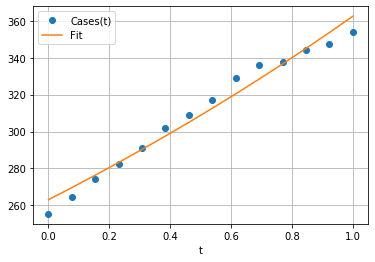

In [61]:
import matplotlib.pyplot as plt
plt.plot(t2, data_IT[:, 0], 'o',  label='Cases(t)')
# plt.plot(t2, data_IT[:, 1], 'o', label='Deaths(t)')
plt.plot(t2, f(t2, *popt2), '-',  label='Fit')

plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()